#                                       **CIFAR-10: Image Classification**

#   Step 1: Data Preprocessing & Loading 
##  Visualization of Images and Labels / Inserting Grayscale Conversion / Augmentation 


%pip install matplotlib
%pip install numpy
%pip install tensorflow
%pip install tensorflow-gpu

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, RandomFlip, RandomRotation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'cudnn'

In [2]:
# Load the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Check data dimensions
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


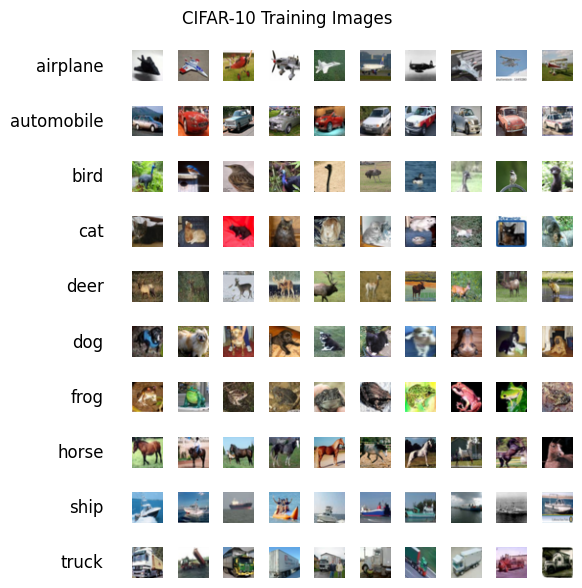

In [6]:
# Define a list with all the class labels for CIFAR-10
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Function to visualize color images from CIFAR-10 dataset with correct labeling
def visualize_color_images_with_labels(images, labels, classes, images_per_class=10, title="CIFAR-10 Images"):
    num_classes = len(classes)
    total_images = num_classes * images_per_class

    plt.figure(figsize=(6, 6))
    image_count = 0

    # Loop through class labels to pick images_per_class images per class
    for class_index, class_name in enumerate(classes):
        class_images = images[labels.flatten() == class_index][:images_per_class]

        # Loop through the images, arranging them dynamically
        for img in class_images:
            plt.subplot(num_classes, images_per_class, image_count + 1)
            plt.imshow(img)
            plt.axis('off')
            
            # Add class label to the left side of each row
            if image_count % images_per_class == 0:
                plt.text(-30, 32 // 2, class_name, rotation=0, size='large', va='center', ha='right')
            
            image_count += 1
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Visualize color images from the CIFAR-10 training set
visualize_color_images_with_labels(x_train, y_train, classes, images_per_class=10, title="CIFAR-10 Training Images")


In [7]:
# Data Augmentation:

# Convert images to grayscale

grayscale_x_train = tf.image.rgb_to_grayscale(x_train)
grayscale_x_test = tf.image.rgb_to_grayscale(x_test)

gray_x_train = np.array(grayscale_x_train)
gray_x_test = np.array(grayscale_x_test)

print(gray_x_train.shape)
print(gray_x_test.shape)

# Create augmentation layer for model (used further down)

data_augmentation = Sequential([
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.2),
]) 


(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [8]:
# Normalize the images to the range [0, 1]
x_train_normalized = gray_x_train.astype('float32') / 255.0
x_test_normalized = gray_x_test.astype('float32') / 255.0

print(x_train_normalized.shape)
print(x_test_normalized.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [9]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


Task, Diego:
Transfer Traning (VGG-16 can work well, imagenit, inseption, densnet, resnet) Check which one is the most efficient to clasify our image model.
Build a model Densnet
- Research different networks to see what kind of data they were trained on (image classes, how many...?)
- Decide on best one for our dataset
- Think about how many layers to add on top of that for our specific model
- Think about which layers to freeze/ unfreeze when training with the new layers
- Adjust epochs, other parameters related to our new model which could optimize

# DenseNet Model

In [1]:
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.images import ImageDataGenerator


ModuleNotFoundError: No module named 'keras'

#  Step 4: Model Evaluation
## Evaluate the Model and Compute Metrics